## Binomial tree option pricing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def Binomial_tree_option_price(Style, Class, Stock_price, Volatility,
                              Risk_free_rate, Time_to_exercise,
                              Exercise_price, Tree_step):
    s0 = Stock_price 
    v = Volatility 
    rf = Risk_free_rate
    T = Time_to_exercise # years
    k = Exercise_price
    stp = Tree_step
    
    dt = T/stp
    u = np.exp(v*np.sqrt(dt))
    d = 1/u
    p = (np.exp(rf*dt) - d)/(u - d)
    
    S_table = pd.DataFrame(np.zeros([stp+1, stp+1])*np.nan)
    for i in range (stp+1):
        for j in range (i+1):
            S_table.iloc[i,j] = s0*np.power(u,(i-j))*np.power(d,(j))
                                              
            
    f_table = pd.DataFrame(np.zeros([stp+1, stp+1])*np.nan)
    f_table.iloc[-1,:] = S_table.iloc[-1,:]-k
    f_table = f_table.applymap(lambda x: max(x,0) if (Class=="c") else max(-x,0) if 
                               (Class=="p") else np.nan) # distinguish between call & put
    
    
    color = pd.DataFrame(np.zeros([stp+1, stp+1])*np.nan)
    color.iloc[-1,:] = 'black'
    
    
    if Style=="eu":     
        for i in range (stp-1,-1,-1):
            for j in range (i+1):
                f_table.iloc[i,j] = (p*f_table.iloc[i+1,j] + (1-p)*f_table.iloc[i+1,j+1])*np.exp(-rf*dt)
                color.iloc[i,j] = 'blue'
    elif Style=="am":
        for i in range (stp-1,-1,-1):
            for j in range (i+1):
                f = (p*f_table.iloc[i+1,j] + (1-p)*f_table.iloc[i+1,j+1])*np.exp(-rf*dt)
                f_table.iloc[i,j] = (max(f,S_table.iloc[i,j]-k) if (Class=="c") else 
                                     max(f,k-S_table.iloc[i,j]) if (Class=="p") else np.nan) # distinguish between call & put
                color.iloc[i,j] = 'blue' if f_table.iloc[i,j]==f else 'red'                
    color.iloc[0,0] = 'green'
    
    
    fig = plt.figure(figsize=[20,20])
    ax = fig.add_subplot()
    for ii in range(stp):
        x = [1, 0, 1]
        for j in range(ii):
            x.append(0)
            x.append(1)
        x = np.array(x) + ii
        y = np.arange(-(ii+1), ii+2)[::-1]
        for i in range (stp+1):
            for j in range (i+1):
                plt.annotate('{}\n{}'.format("{:.5f}".format(S_table.iloc[i,j]),"{:.5f}".format(f_table.iloc[i,j])),
                             xy=(i,i-2*j),xycoords="data",va="center", ha="center",size=12,
                             bbox=dict(boxstyle="round", fc="w"),color=color.iloc[i,j])
        
        ax.text(0, stp, 'At each node:', fontsize=14)
        ax.text(0, stp-1*stp/25, ' Upper value = Underlying Asset Price', fontsize=14)
        ax.text(0, stp-2*stp/25, ' Lower value = Option Price', fontsize=14)
        ax.text(0, stp-3*stp/25, 'Values in red are a result of early exercise.', fontsize=14)
        ax.text(0, stp-5*stp/25, 'Strike price = {}'.format(k), fontsize=14)
        ax.text(0, stp-6*stp/25, 'Discount factor per step = {}'.format(round(np.exp(-rf*dt),5)), fontsize=14)
        ax.text(0, stp-7*stp/25, 'Time step, dt = {} years, {} days'.format(round(dt,4),round(dt*365,4)), fontsize=14)
        ax.text(0, stp-8*stp/25, 'Growth factor per step, a = {}'.format(round(np.exp(rf*dt),5)), fontsize=14)
        ax.text(0, stp-9*stp/25, 'Probability of up move, p = {}'.format(round(p,5)), fontsize=14)
        ax.text(0, stp-10*stp/25, 'Up step size, u = {}'.format(round(u,5)), fontsize=14)
        ax.text(0, stp-11*stp/25, 'Down step size, d = {}'.format(round(d,5)), fontsize=14)
        plt.plot(x, y, 'k-')
        


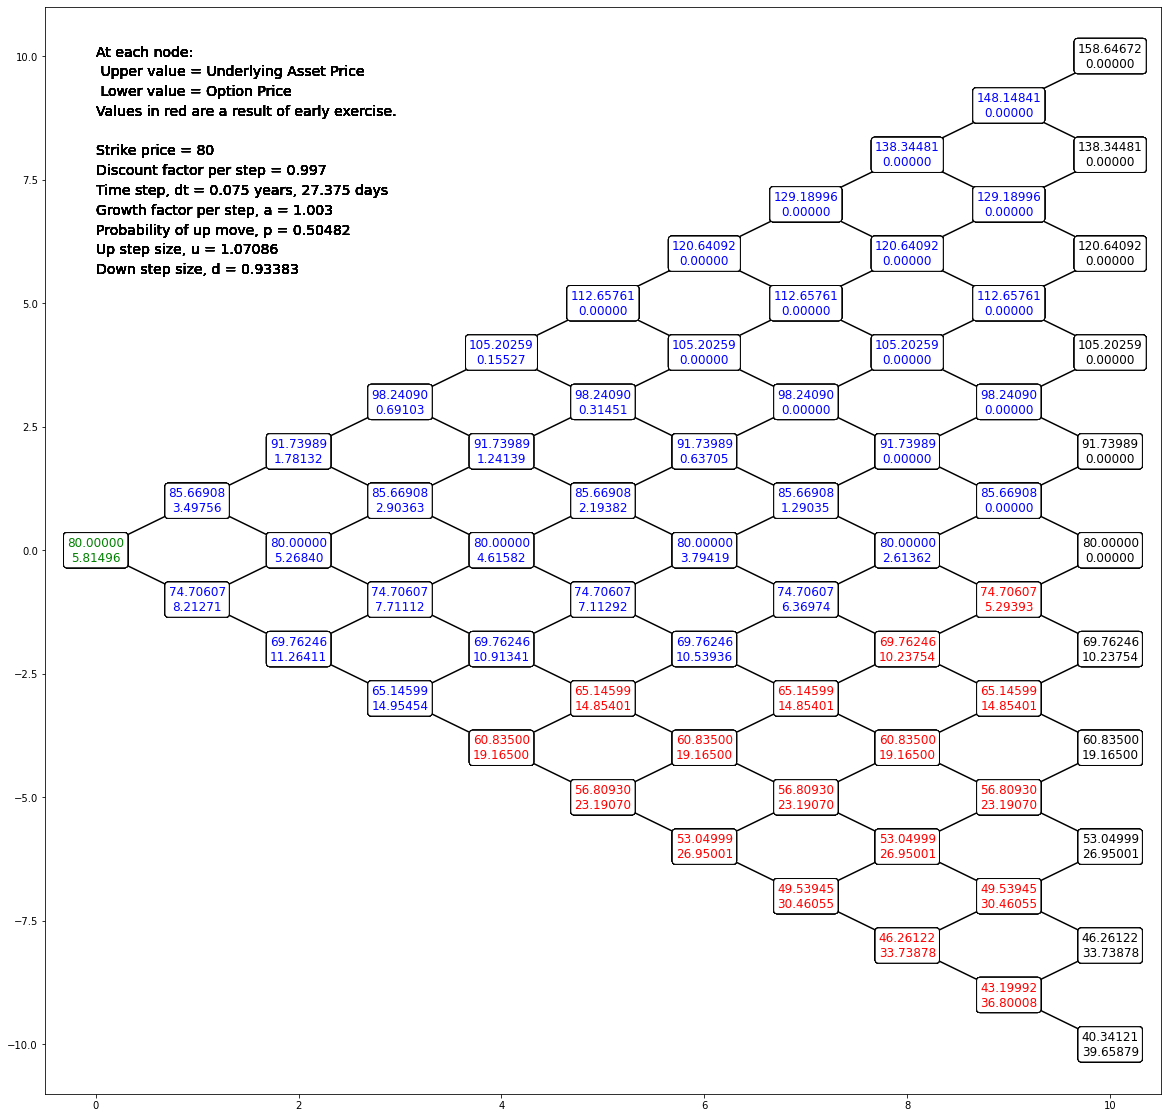

In [4]:
Binomial_tree_option_price("am","p",80,0.25,0.04,0.75,80,10)